In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
file_path = '/content/drive/MyDrive/UNSW_NB15_training-set.csv'
data = pd.read_csv(file_path)

In [ ]:
#Count number of entries for each categories
data.attack_cat.value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [ ]:
#check number of column header
print(data.columns)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [ ]:
# Define a mapping from category to numerical value
category_mapping = {
    'Normal': 0,
    'Generic': 1,
    'Exploits': 2,
    'Fuzzers': 3,
    'DoS': 4,
    'Reconnaissance':5
}

# Apply the mapping to the 'attack_cat' column
data['attack_cat'] = data['attack_cat'].map(category_mapping)

In [ ]:
# Keep only the rows in 'attack_cat' to match the mapping
data = data[data['attack_cat'].isin([0, 1, 2, 3, 4, 5])]

In [ ]:
# Save the modified DataFrame to a csv file
data.to_csv('modified_data.csv', index=False)

In [ ]:
# Print the first 5 rows of the DataFrame
print(data.head())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [ ]:
# Identify columns with non-numerical data
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print("Non-numerical columns:", non_numeric_cols)

#handle non-numerical columns
data = data.drop(non_numeric_cols, axis=1)

Non-numerical columns: Index(['proto', 'service', 'state'], dtype='object')


In [ ]:
# Save the modified DataFrame to a csv file
data.to_csv('modified_data.csv', index=False)

In [ ]:
#Count number of entries for each categories
data.attack_cat.value_counts()

attack_cat
0.0    56000
1.0    40000
2.0    33393
3.0    18184
4.0    12264
5.0    10491
Name: count, dtype: int64

In [ ]:
# Load the dataset
data = pd.read_csv('modified_data.csv')

# Separate features and target
X = data.drop(['attack_cat'], axis=1)
y = data['attack_cat']

# Convert 'attack_cat' to integer type
y = y.astype('int32')

# Number of classes
num_classes = y.nunique()

# Convert class vectors to binary class matrices (one-hot encoding)
y = to_categorical(y, num_classes)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize the ANN
model = Sequential()

# Add the input layer and the first hidden layer with dropout
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.05))

# Add the second hidden layer with dropout
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.075))

# Add the third hidden layer with dropout
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.1))

# Add the output layer
model.add(Dense(units=num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the ANN
model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the ANN on the training set
model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=200, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Epoch 1/200
3407/3407 [==============================] - 11s 3ms/step - loss: 0.4312 - accuracy: 0.8283 - val_loss: 0.3521 - val_accuracy: 0.8578
Epoch 2/200
3407/3407 [==============================] - 11s 3ms/step - loss: 0.3542 - accuracy: 0.8583 - val_loss: 0.3346 - val_accuracy: 0.8642
Epoch 3/200
3407/3407 [==============================] - 8s 2ms/step - loss: 0.3349 - accuracy: 0.8639 - val_loss: 0.3190 - val_accuracy: 0.8701
Epoch 4/200
3407/3407 [==============================] - 9s 3ms/step - loss: 0.3242 - accuracy: 0.8684 - val_loss: 0.3231 - val_accuracy: 0.8711
Epoch 5/200
3407/3407 [==============================] - 8s 2ms/step - loss: 0.3181 - accuracy: 0.8696 - val_loss: 0.3172 - val_accuracy: 0.8704
Epoch 6/200
3407/3407 [==============================] - 10s 3ms/step - loss: 0.3140 - accuracy: 0.8701 - val_loss: 0.3091 - val_accuracy: 0.8716
Epoch 7/200
3407/3407 [==============================] - 10s 3ms/step - loss: 0.3097 - accuracy: 0.8720 - val_loss: 0.2982 - va

1065/1065 [==============================] - 1s 1ms/step


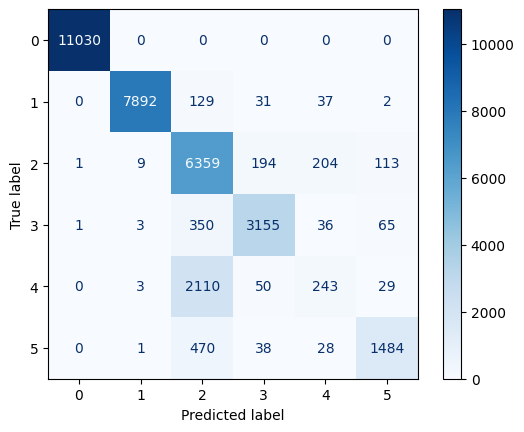

Train ROC AUC Score: 0.8743983446663185
Test ROC AUC Score: 0.8723386072644174


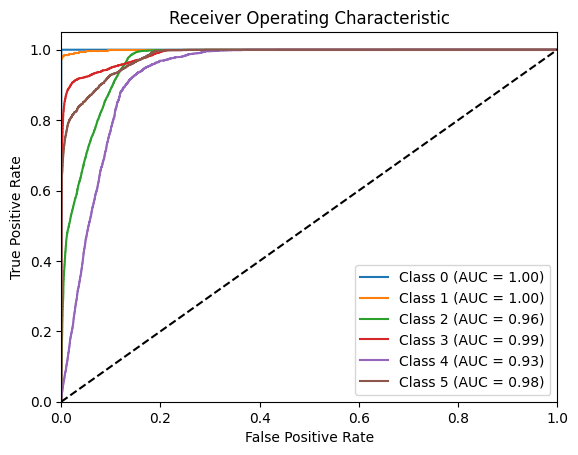

In [ ]:
# Predict probabilities
y_train_prob = model.predict(X_train)
y_test_prob = model.predict(X_test)

# Convert probabilities to classes
y_train_pred = np.argmax(y_train_prob, axis=1)
y_test_pred = np.argmax(y_test_prob, axis=1)

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5 ])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute ROC AUC
lb = LabelBinarizer()
lb.fit(y_train)
y_train_lb = lb.transform(y_train)
y_test_lb = lb.transform(y_test)
y_train_pred_lb = lb.transform(y_train_pred)
y_test_pred_lb = lb.transform(y_test_pred)

roc_auc_train = roc_auc_score(y_train_lb, y_train_pred_lb, multi_class='ovr')
roc_auc_test = roc_auc_score(y_test_lb, y_test_pred_lb, multi_class='ovr')

print(f"Train ROC AUC Score: {roc_auc_train}")
print(f"Test ROC AUC Score: {roc_auc_test}")

# Plot ROC curves
fig, ax = plt.subplots()
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_lb[:, i], y_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f'Class {i}')
    display.plot(ax=ax) # Plot on the same axe

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()